In [2]:
import h5py 
import numpy as np 
import pandas as pd 
import xgboost
from xgboost import XGBRegressor 

import pandas as pd
import numpy as np
from scipy.stats import maxwell
from numpy.random import lognormal, normal

from matplotlib import pyplot as plt 
from sklearn.metrics import mean_squared_error as mse


import pandas as pd
import shap
import sklearn


In [ ]:
with h5py.File("Downloads/vigna-2021-v4-vqtl-all-utf-v2.h5", "r") as f:
    # List all groups
    print("Keys: %s" % f.keys())
    keys = list(f.keys())
    vigna = {k: list(f[k]) for k in keys}

In [6]:
names = ["shapley_data_" + str(i) for i in range(1, 8)]

def read_file(name):
    with h5py.File(name + ".h5", "r") as f:
    # List all groups
        print("Keys: %s" % f.keys())
        keys = list(f.keys())
        data = {k: list(f[k]) for k in keys}
    return data

In [8]:
shap_values = []
for name in names:
    shap_values.append(read_file(name))

Keys: <KeysViewHDF5 ['base_values', 'data', 'values']>
Keys: <KeysViewHDF5 ['base_values', 'data', 'values']>
Keys: <KeysViewHDF5 ['base_values', 'data', 'values']>
Keys: <KeysViewHDF5 ['base_values', 'data', 'values']>
Keys: <KeysViewHDF5 ['base_values', 'data', 'values']>
Keys: <KeysViewHDF5 ['base_values', 'data', 'values']>
Keys: <KeysViewHDF5 ['base_values', 'data', 'values']>


In [16]:
mean_abs = np.mean([np.abs(sh['values']) for sh in shap_values], axis = (1, 0))

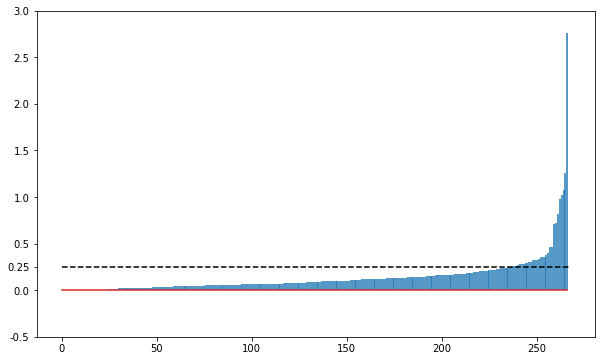

In [32]:
plt.figure(figsize=(10, 6))
plt.stem(sorted(mean_abs), markerfmt=' ')
plt.hlines(0.25, 0, 267, linestyle="dashed", color='black')
#plt.gca().set_yticks([0.25])
#plt.gca().set_yticklabels(["Threshold"])
#plt.plot([0, 267], [0.25, 0.25])


yt = plt.gca().get_yticks() 
yt=np.append(yt,0.25)

ytl=yt.tolist()
ytl[-1]="0.25"

plt.gca().set_yticks(yt)
plt.gca().set_yticklabels(ytl)


plt.savefig('shpley_1.jpeg')